In [43]:
import os
import numpy as np
import math
import time
from server_pull import pull
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\limci\\Desktop\\DBA5101 BA econs\\Group assignment 3'

In [50]:
# testing pull
# from server_pull import pull
# pull function has the following syntax: pull(user_group, secret_key, arm)
# please change 'test_user' and 'aaaaaaaa' to your own user_group and secret_key respectively
# test_output = pull('test_user','aaaaaaaa',19)
# output = pull('user32','cnERvnBr',2)
# test_output = pull('test_user','aaaaaaaa',19)
# output = pull('user40','XEq6wByD',2)

In [51]:
output

{'Arm': '2', 'NetReward': 1534104, 'Pull': 76480, 'Reward': 14}

In [5]:
## test for rough values of each arm

# for i in range(24):
#     output = pull('user40','XEq6wByD',i)
#     print(output)

In [69]:
import math

class UCBAgent:
    def __init__(self, num_actions):
        self.num_actions = num_actions # number of arms in the machine
        self.q_values = [0] * num_actions # average reward for each arm
        self.action_counts = [0] * num_actions # number of pulls for each arm
        self.total_actions = 0 # total number of pulls
        self.total_rewards = [0] * num_actions # total number of rewards for each arm

    def choose_action(self):
        # use ucb probability to decide arm to pull
        ucb_values = [0] * self.num_actions
        for i in range(self.num_actions):
            if self.action_counts[i] == 0:
                # pull each arm at least once first
                return i
            else:
                # calculate ucb formula
                exploration_bonus = math.sqrt(2 * math.log(self.total_actions) / self.action_counts[i])
                ucb_values[i] = self.q_values[i] + exploration_bonus

        # pull arm with highest ucb probability
        return ucb_values.index(max(ucb_values))

    def update_q_values(self, action, reward):
        # append new values from pull for storage
        self.total_actions += 1
        self.action_counts[action] += 1
        self.total_rewards[action] += reward
        self.q_values[action] = self.total_rewards[action] / self.action_counts[action]

        
def regret(reward_list, tot_round):
    # plot regret function to see when it stabalises
    x = [i for i in range(1, tot_round+1)]
    y = []
    mul_star = max(agent.q_values)
    # Graph Plot    
    for num_round in range(1, tot_round+1):        
        round_total = sum(reward_list[0:num_round])
        y.append((mul_star * num_round) - round_total)

    plt.plot(x,y)
    plt.xlabel("No. of Rounds")
    plt.ylabel("Total Regret")
    plt.title(tot_round)
    plt.show()
    
# function to interact with pull()
def pull1(n):
    # result = pull('test_user','aaaaaaaa',n) ### TEST PULL
    # results = pull('user32','cnERvnBr',n)
    result = pull('user40','XEq6wByD',n)   ### ACTUAL PULL 
    return result['Reward']

In [55]:
start_time = time.time()

# Example usage
num_actions = 24  # Number of available arms
num_steps = 1000  # Number of steps to simulate
# Create a UCB agent
agent = UCBAgent(num_actions)

# Simulate interactions with the environment and update Q-values

reward_list = [0]*num_steps
for step in range(num_steps):
    # Choose an action
    action = agent.choose_action()

    # Simulate the reward from the chosen action using the pull(n) function
    reward = pull1(action)
    reward_list[step] += reward
    # Update Q-values based on the observed reward
    agent.update_q_values(action, reward)
    # print(step, reward['Arm'], reward['Reward'])
    # regret_values = calculate_regret(agent, optimal_rewards, num_steps)


end_time = time.time()
execution_time =   end_time - start_time
print("Execution time:",execution_time)

Execution time: 51.299474477767944


In [56]:
agent.q_values

[11.0,
 20.0,
 21.166666666666668,
 18.5,
 20.5,
 16.0,
 17.5,
 14.0,
 17.0,
 16.0,
 21.0,
 13.0,
 11.0,
 22.181818181818183,
 4.0,
 22.944504896626768,
 17.0,
 11.0,
 12.0,
 7.0,
 20.666666666666668,
 20.666666666666668,
 5.0,
 17.0]

Total reward sum across all arms: 22683 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 11,  pulled 1 times, Average Reward = 11.0
Arm 1: Total Reward = 40,  pulled 2 times, Average Reward = 20.0
Arm 2: Total Reward = 254,  pulled 12 times, Average Reward = 21.166666666666668
Arm 3: Total Reward = 37,  pulled 2 times, Average Reward = 18.5
Arm 4: Total Reward = 82,  pulled 4 times, Average Reward = 20.5
Arm 5: Total Reward = 16,  pulled 1 times, Average Reward = 16.0
Arm 6: Total Reward = 35,  pulled 2 times, Average Reward = 17.5
Arm 7: Total Reward = 14,  pulled 1 times, Average Reward = 14.0
Arm 8: Total Reward = 34,  pulled 2 times, Average Reward = 17.0
Arm 9: Total Reward = 16,  pulled 1 times, Average Reward = 16.0
Arm 10: Total Reward = 105,  pulled 5 times, Average Reward = 21.0
Arm 11: Total Reward = 13,  pulled 1 times, Average Reward = 13.0
Arm 12: Total Reward = 11,  pulled 1 times, Average Reward = 11.0
Arm 13: T

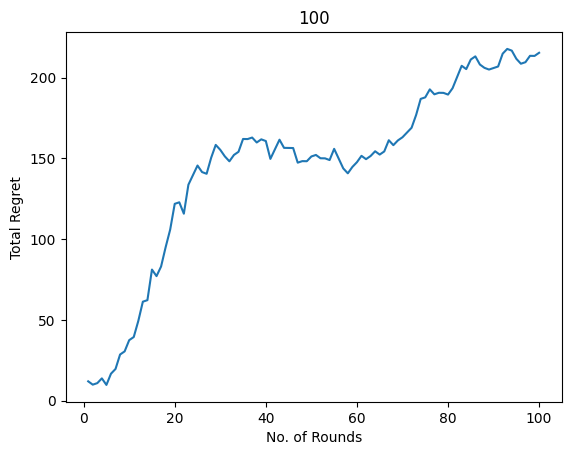

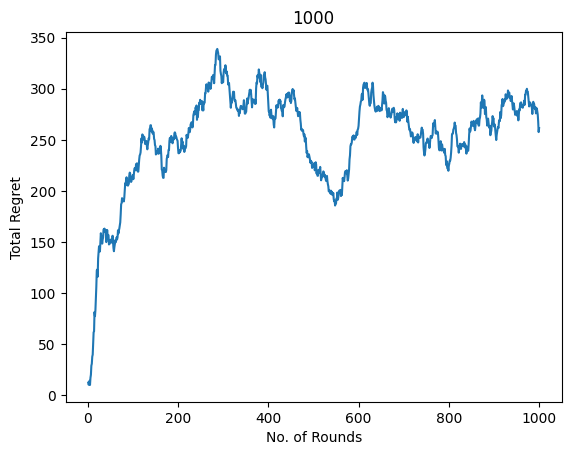

In [70]:
# Calculate total reward sum across all arms
total_reward_sum = sum(agent.total_rewards)
num_pulls_sum = sum(agent.action_counts)
# Print the total reward sum across all arms
print(f"Total reward sum across all arms: {total_reward_sum} from total of {num_pulls_sum} pulls.")
print('-----------------------------------------------------------')

for i in range(num_actions):
    total_reward = agent.total_rewards[i]
    num_pulls = agent.action_counts[i]
    average_reward = total_reward / agent.action_counts[i] if agent.action_counts[i] > 0 else 0
    print(f"Arm {i}: Total Reward = {total_reward},  pulled {num_pulls} times, Average Reward = {average_reward}")

print("\n##########################################################################################")
print("Regret Plot")
# print("##########################################################################################\n")
regret(reward_list, min(100, num_steps))
regret(reward_list, num_steps)

In [64]:
# verify output
n = num_steps
max_reward = max(agent.q_values) * num_steps
total_reward = sum(reward_list[0:n])
max_reward, total_reward, max_reward-total_reward

(22944.504896626768, 22683, 261.50489662676773)

In [58]:
reward_list

[11,
 25,
 22,
 20,
 27,
 16,
 20,
 14,
 21,
 16,
 21,
 13,
 11,
 22,
 4,
 27,
 17,
 11,
 12,
 7,
 22,
 30,
 5,
 17,
 17,
 27,
 24,
 13,
 15,
 26,
 27,
 26,
 19,
 21,
 15,
 23,
 22,
 26,
 21,
 24,
 34,
 17,
 17,
 28,
 23,
 23,
 32,
 22,
 23,
 20,
 22,
 25,
 23,
 24,
 16,
 29,
 29,
 26,
 19,
 20,
 19,
 25,
 21,
 20,
 25,
 21,
 16,
 26,
 20,
 21,
 20,
 20,
 15,
 13,
 22,
 18,
 26,
 22,
 23,
 24,
 19,
 16,
 16,
 25,
 17,
 21,
 28,
 25,
 24,
 22,
 22,
 15,
 20,
 24,
 28,
 26,
 22,
 19,
 23,
 21,
 27,
 19,
 18,
 21,
 24,
 24,
 17,
 24,
 21,
 30,
 24,
 23,
 17,
 17,
 19,
 22,
 21,
 17,
 15,
 27,
 15,
 24,
 27,
 22,
 21,
 25,
 28,
 22,
 24,
 20,
 28,
 26,
 19,
 20,
 19,
 24,
 13,
 22,
 20,
 23,
 29,
 20,
 25,
 26,
 21,
 24,
 29,
 24,
 28,
 24,
 31,
 21,
 24,
 21,
 23,
 20,
 28,
 21,
 22,
 25,
 16,
 26,
 30,
 36,
 24,
 28,
 25,
 23,
 13,
 26,
 24,
 21,
 25,
 21,
 12,
 21,
 21,
 25,
 16,
 23,
 14,
 20,
 26,
 24,
 17,
 26,
 26,
 24,
 18,
 23,
 24,
 17,
 22,
 24,
 27,
 22,
 25,
 24,
 24,
 30,
 28

# Test for repeatability
Running algorithm n times to check for a similar outcome


In [73]:
n_test = 5
test_steps = 1000
print("prepare to consume", n_test*test_steps, "pulls")

prepare to consume 5000 pulls


Round 0 Execution time: 44.662269115448
Total reward sum across all arms: 23654 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 6,  pulled 1 times, Average Reward = 6.0
Arm 1: Total Reward = 17,  pulled 1 times, Average Reward = 17.0
Arm 2: Total Reward = 3260,  pulled 148 times, Average Reward = 22.027027027027028
Arm 3: Total Reward = 55,  pulled 3 times, Average Reward = 18.333333333333332
Arm 4: Total Reward = 12,  pulled 1 times, Average Reward = 12.0
Arm 5: Total Reward = 82,  pulled 4 times, Average Reward = 20.5
Arm 6: Total Reward = 17,  pulled 1 times, Average Reward = 17.0
Arm 7: Total Reward = 17,  pulled 1 times, Average Reward = 17.0
Arm 8: Total Reward = 11,  pulled 1 times, Average Reward = 11.0
Arm 9: Total Reward = 36,  pulled 2 times, Average Reward = 18.0
Arm 10: Total Reward = 100,  pulled 5 times, Average Reward = 20.0
Arm 11: Total Reward = 7,  pulled 1 times, Average Reward = 7.0
Arm 12: Total Reward = 

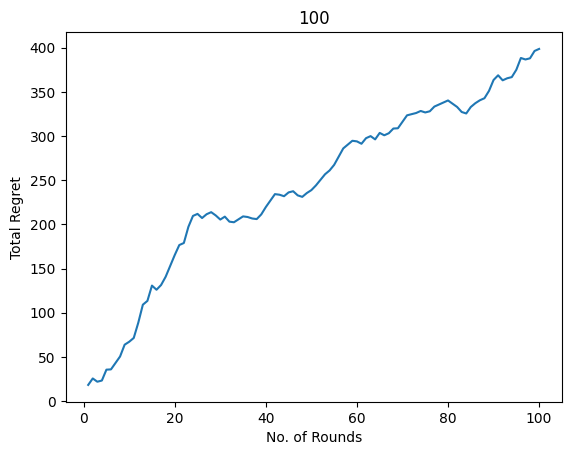

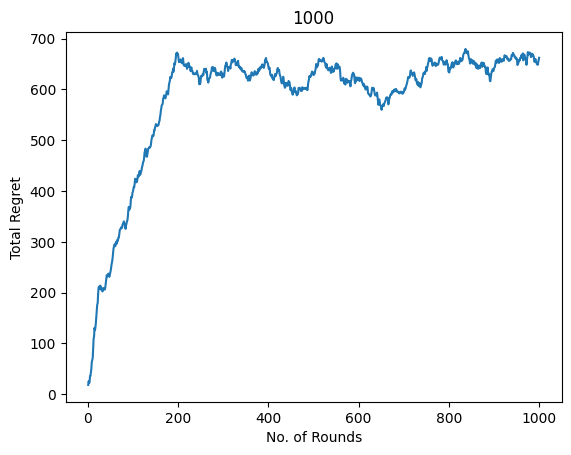

Round 1 Execution time: 47.32805919647217
Total reward sum across all arms: 24031 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 8,  pulled 1 times, Average Reward = 8.0
Arm 1: Total Reward = 40,  pulled 2 times, Average Reward = 20.0
Arm 2: Total Reward = 390,  pulled 17 times, Average Reward = 22.941176470588236
Arm 3: Total Reward = 37,  pulled 2 times, Average Reward = 18.5
Arm 4: Total Reward = 38,  pulled 2 times, Average Reward = 19.0
Arm 5: Total Reward = 41,  pulled 2 times, Average Reward = 20.5
Arm 6: Total Reward = 16,  pulled 1 times, Average Reward = 16.0
Arm 7: Total Reward = 13,  pulled 1 times, Average Reward = 13.0
Arm 8: Total Reward = 14,  pulled 1 times, Average Reward = 14.0
Arm 9: Total Reward = 43,  pulled 2 times, Average Reward = 21.5
Arm 10: Total Reward = 37,  pulled 2 times, Average Reward = 18.5
Arm 11: Total Reward = 11,  pulled 1 times, Average Reward = 11.0
Arm 12: Total Reward = 5,  pulled 1 

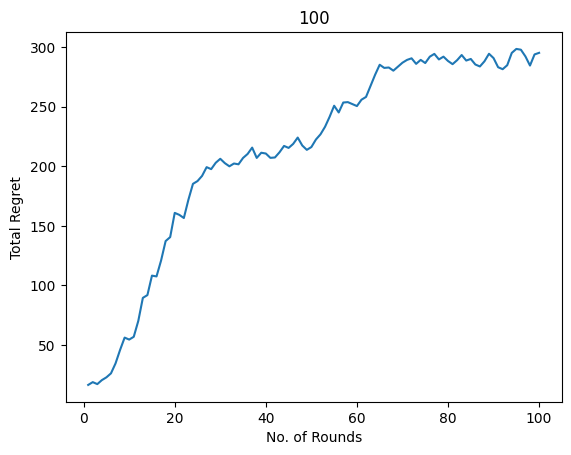

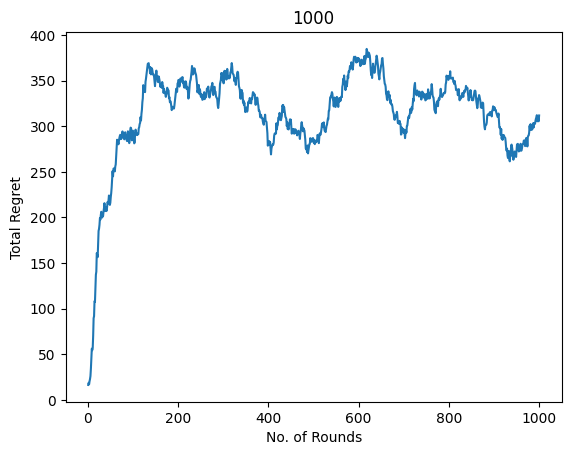

Round 2 Execution time: 42.84540915489197
Total reward sum across all arms: 24393 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 7,  pulled 1 times, Average Reward = 7.0
Arm 1: Total Reward = 12,  pulled 1 times, Average Reward = 12.0
Arm 2: Total Reward = 39,  pulled 2 times, Average Reward = 19.5
Arm 3: Total Reward = 19,  pulled 1 times, Average Reward = 19.0
Arm 4: Total Reward = 20,  pulled 1 times, Average Reward = 20.0
Arm 5: Total Reward = 91,  pulled 4 times, Average Reward = 22.75
Arm 6: Total Reward = 10,  pulled 1 times, Average Reward = 10.0
Arm 7: Total Reward = 42,  pulled 2 times, Average Reward = 21.0
Arm 8: Total Reward = 12,  pulled 1 times, Average Reward = 12.0
Arm 9: Total Reward = 43,  pulled 2 times, Average Reward = 21.5
Arm 10: Total Reward = 39,  pulled 2 times, Average Reward = 19.5
Arm 11: Total Reward = 7,  pulled 1 times, Average Reward = 7.0
Arm 12: Total Reward = 5,  pulled 1 times, Average Re

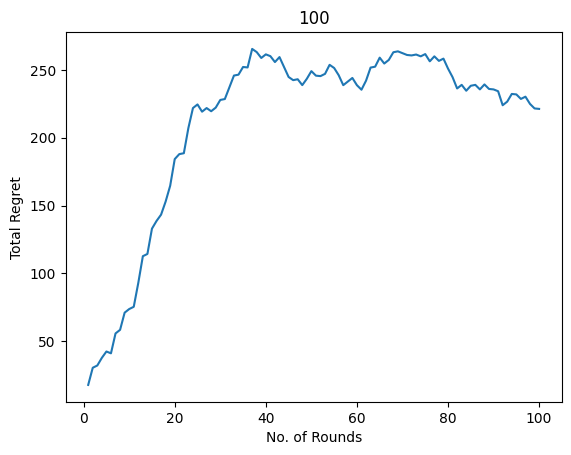

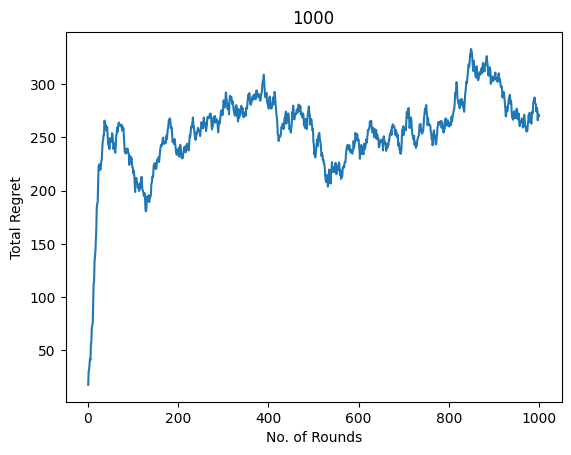

Round 3 Execution time: 44.614590644836426
Total reward sum across all arms: 24015 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 4,  pulled 1 times, Average Reward = 4.0
Arm 1: Total Reward = 13,  pulled 1 times, Average Reward = 13.0
Arm 2: Total Reward = 61,  pulled 3 times, Average Reward = 20.333333333333332
Arm 3: Total Reward = 81,  pulled 4 times, Average Reward = 20.25
Arm 4: Total Reward = 19,  pulled 1 times, Average Reward = 19.0
Arm 5: Total Reward = 15,  pulled 1 times, Average Reward = 15.0
Arm 6: Total Reward = 19,  pulled 1 times, Average Reward = 19.0
Arm 7: Total Reward = 37,  pulled 2 times, Average Reward = 18.5
Arm 8: Total Reward = 11,  pulled 1 times, Average Reward = 11.0
Arm 9: Total Reward = 61,  pulled 3 times, Average Reward = 20.333333333333332
Arm 10: Total Reward = 18,  pulled 1 times, Average Reward = 18.0
Arm 11: Total Reward = 10,  pulled 1 times, Average Reward = 10.0
Arm 12: Total Reward =

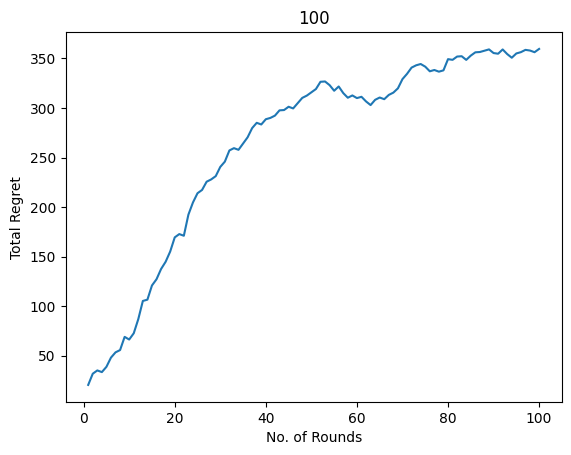

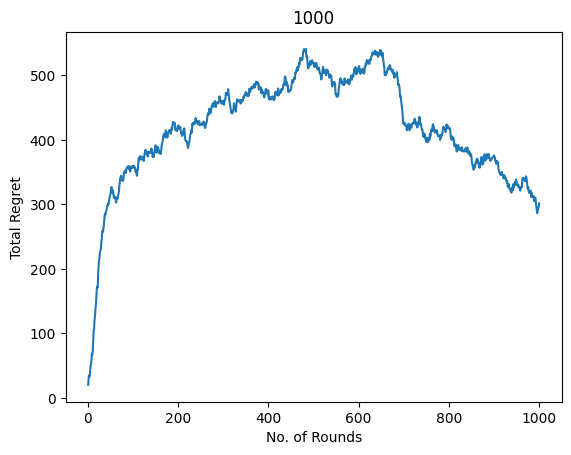

Round 4 Execution time: 49.42964482307434
Total reward sum across all arms: 24268 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 10,  pulled 1 times, Average Reward = 10.0
Arm 1: Total Reward = 20,  pulled 1 times, Average Reward = 20.0
Arm 2: Total Reward = 59,  pulled 3 times, Average Reward = 19.666666666666668
Arm 3: Total Reward = 39,  pulled 2 times, Average Reward = 19.5
Arm 4: Total Reward = 18,  pulled 1 times, Average Reward = 18.0
Arm 5: Total Reward = 39,  pulled 2 times, Average Reward = 19.5
Arm 6: Total Reward = 16,  pulled 1 times, Average Reward = 16.0
Arm 7: Total Reward = 20,  pulled 1 times, Average Reward = 20.0
Arm 8: Total Reward = 16,  pulled 1 times, Average Reward = 16.0
Arm 9: Total Reward = 14,  pulled 1 times, Average Reward = 14.0
Arm 10: Total Reward = 35,  pulled 2 times, Average Reward = 17.5
Arm 11: Total Reward = 14,  pulled 1 times, Average Reward = 14.0
Arm 12: Total Reward = 3,  pulled 1 

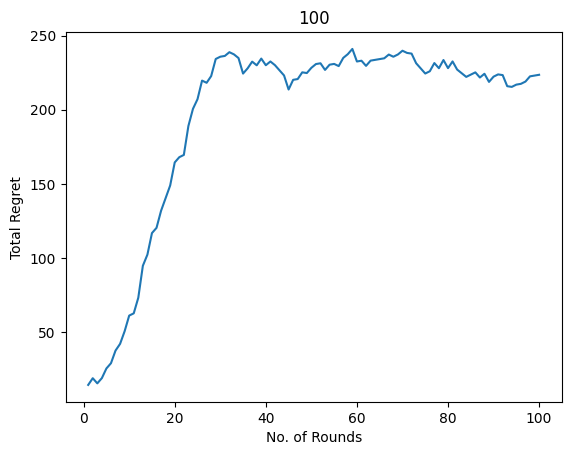

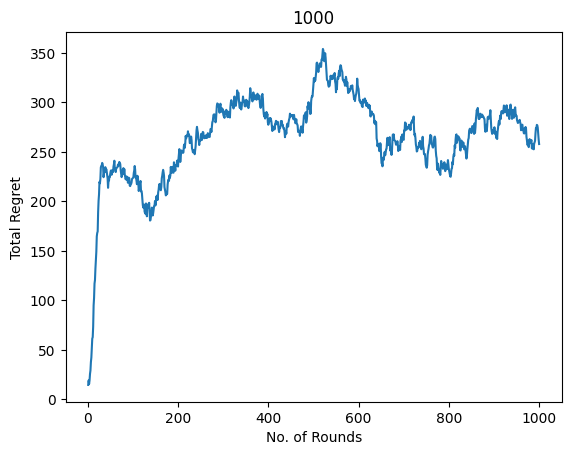

In [75]:
# init for algo
for round in range(n_test):
    start_time = time.time()

    num_actions = 24  
    num_steps = test_steps
    agent = UCBAgent(num_actions)

    reward_list = [0]*num_steps
    for step in range(num_steps):
        action = agent.choose_action()
        reward = pull1(action)
        reward_list[step] += reward
        agent.update_q_values(action, reward)
    end_time = time.time()
    execution_time =   end_time - start_time
    print("Round", round, "Execution time:",execution_time)


    total_reward_sum = sum(agent.total_rewards)
    num_pulls_sum = sum(agent.action_counts)
    print(f"Total reward sum across all arms: {total_reward_sum} from total of {num_pulls_sum} pulls.")
    print('-----------------------------------------------------------')
    
    for i in range(num_actions):
        total_reward = agent.total_rewards[i]
        num_pulls = agent.action_counts[i]
        average_reward = total_reward / agent.action_counts[i] if agent.action_counts[i] > 0 else 0
        print(f"Arm {i}: Total Reward = {total_reward},  pulled {num_pulls} times, Average Reward = {average_reward}")
    
    print("\n##########################################################################################")
    print("Regret Plot")
    regret(reward_list, min(100, num_steps))
    regret(reward_list, num_steps)